# (04) Revert degree

**Motivation**: No more r_ratio, back to everything being measured in degree. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from analysis.opticflow import *
from figures.fighelper import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

## Load data

We will work with one of the experiments: ```expt='clu040'```

In [2]:
file = '/home/hadi/Documents/MTMST/data/ALL_tres25.h5'
file = h5py.File(file, 'r')

expt = 'clu040'
g = file['YUWEI'][expt]
params = np.array(g['hf_params'])
center = np.array(g['hf_center'])
diameter = np.array(g['hf_diameter'])
print(list(g))
file.close()

['badspks', 'hf_center', 'hf_diameter', 'hf_params', 'lfp', 'spks']

## Plot ```params``` & ```center``` distributions

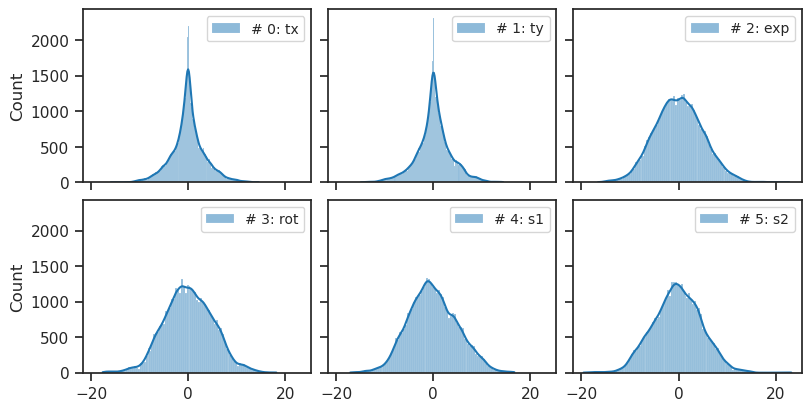

In [4]:
params_dict = {
    0: 'tx',
    1: 'ty',
    2: 'exp',
    3: 'rot',
    4: 's1',
    5: 's2',
}
fig, axes = create_figure(2, 3, (8, 4), 'all', 'all', layout='constrained')
for i in range(6):
    ax = axes.flat[i]
    sns.histplot(params[:, i], kde=True, label=f"# {i}: {params_dict[i]}", ax=ax)
    ax.legend(fontsize=10)
plt.show()

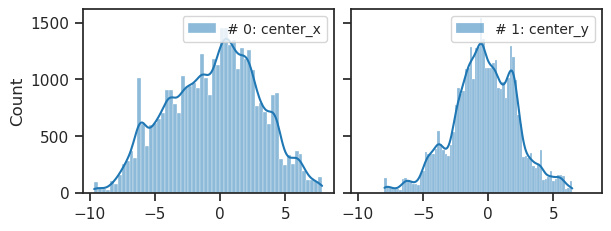

In [5]:
center_dict = {
    0: 'center_x',
    1: 'center_y',
}
fig, axes = create_figure(1, 2, (6, 2.2), 'all', 'all', layout='constrained')
for i in range(2):
    ax = axes.flat[i]
    sns.histplot(center[:, i], kde=True, label=f"# {i}: {center_dict[i]}", ax=ax)
    ax.legend(fontsize=10)
plt.show()

## Generate stim frames

In [6]:
np.unique(diameter).item()

10.0

###  ```dim = 17```

In [7]:
hf_kws = {
    'dim': 17,
    'fov': 15,
    'apply_mask': True,
}
hf = HyperFlow(
    params=params,
    center=center,
    diameter=diameter,
    **hf_kws,
)
stim = hf.compute_hyperflow()
print(f"stim shape: {stim.shape}     ||     spatial resolution: {hf.res}")

stim shape: (38400, 2, 17, 17)     ||     spatial resolution: 1.875

#### Show a few frames from the stimulus

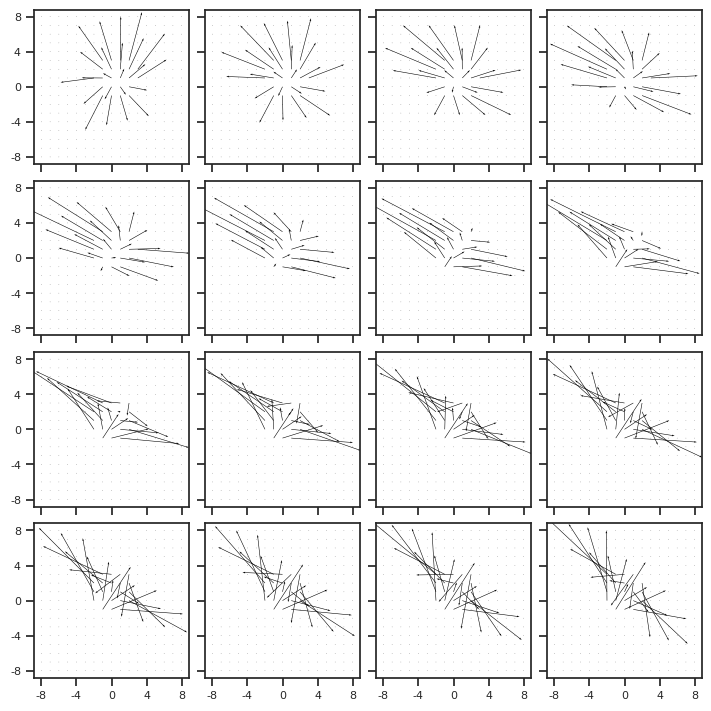

In [9]:
show_opticflow(stim[527:], scale=100);

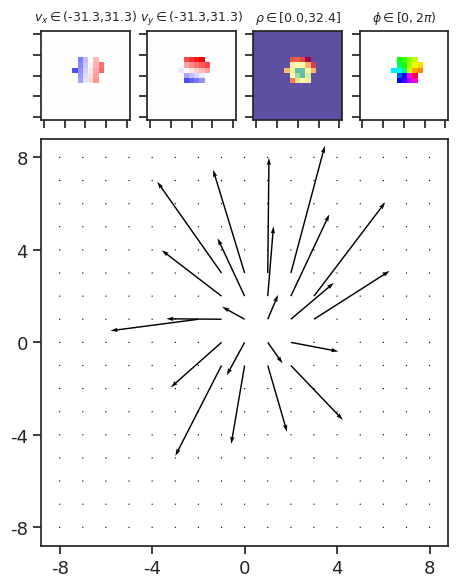

In [10]:
show_opticflow_full(stim[527], scale=100);

#### plot avg norm

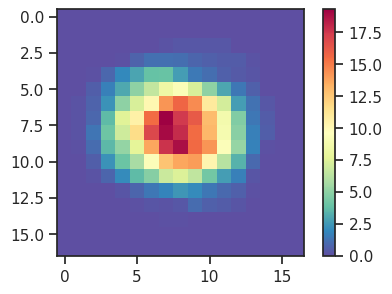

In [11]:
norm = sp_lin.norm(stim, axis=1).mean(0)
plt.imshow(norm, cmap='Spectral_r')
plt.colorbar()
plt.show()

###  ```dim = 25```

In [12]:
hf_kws = {
    'dim': 25,
    'fov': 15,
    'apply_mask': True,
}
hf = HyperFlow(
    params=params,
    center=center,
    diameter=diameter,
    **hf_kws,
)
stim = hf.compute_hyperflow()
print(f"stim shape: {stim.shape}     ||     spatial resolution: {hf.res}")

stim shape: (38400, 2, 25, 25)     ||     spatial resolution: 1.25

#### Show a few frames from the stimulus

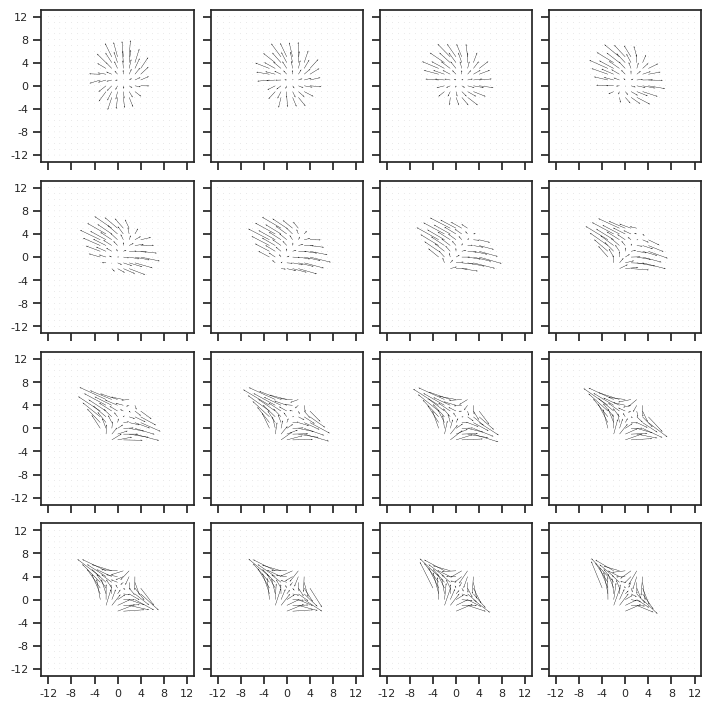

In [16]:
show_opticflow(stim[527:], scale=300);

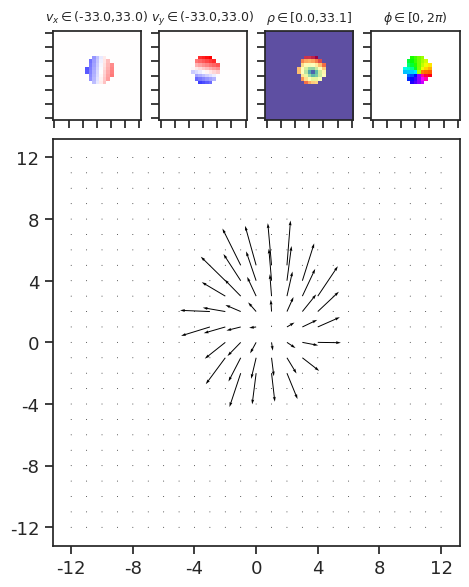

In [17]:
show_opticflow_full(stim[527], scale=300);

#### plot avg norm

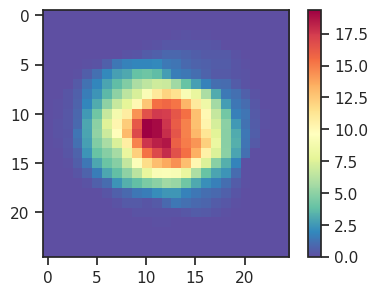

In [18]:
norm = sp_lin.norm(stim, axis=1).mean(0)
plt.imshow(norm, cmap='Spectral_r')
plt.colorbar()
plt.show()

###  ```dim = 50```

In [19]:
hf_kws = {
    'dim': 50,
    'fov': 15,
    'apply_mask': True,
}
hf = HyperFlow(
    params=params,
    center=center,
    diameter=diameter,
    **hf_kws,
)
stim = hf.compute_hyperflow()
print(f"stim shape: {stim.shape}     ||     spatial resolution: {hf.res}")

stim shape: (38400, 2, 50, 50)     ||     spatial resolution: 0.6122448979591837

#### Show a few frames from the stimulus

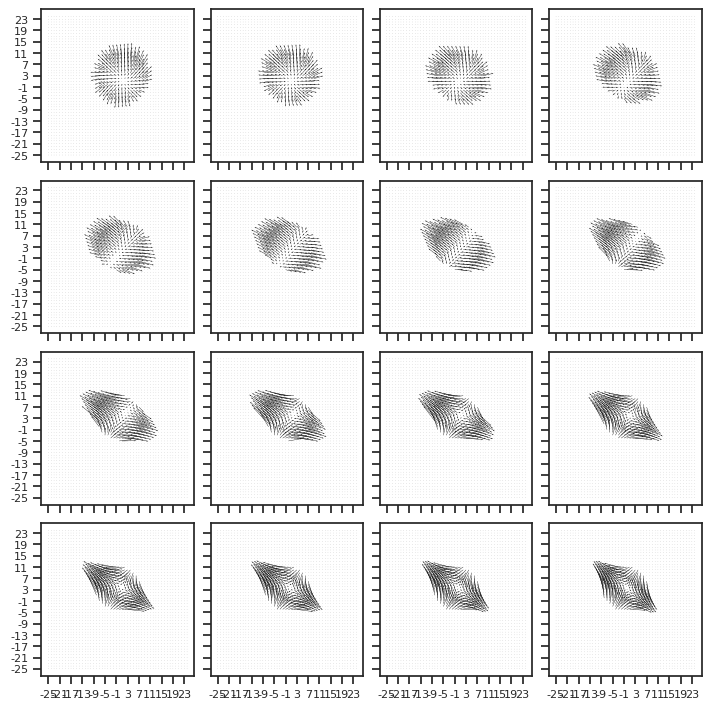

In [22]:
show_opticflow(stim[527:], scale=400);

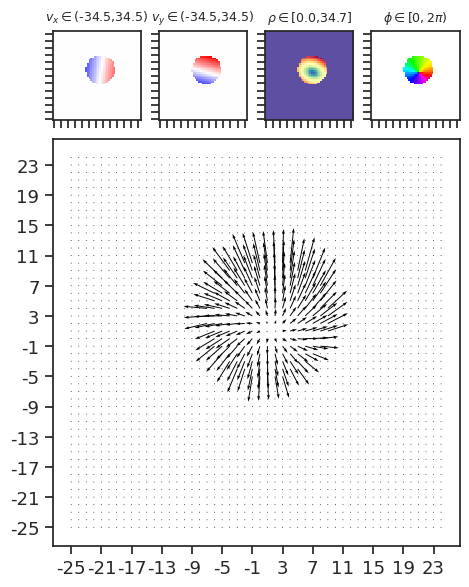

In [23]:
show_opticflow_full(stim[527], scale=400);

#### plot avg norm

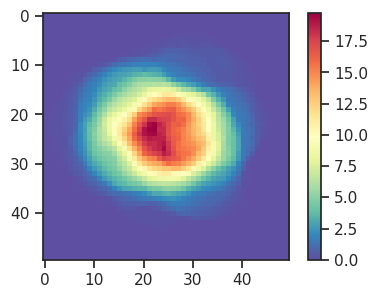

In [24]:
norm = sp_lin.norm(stim, axis=1).mean(0)
plt.imshow(norm, cmap='Spectral_r')
plt.colorbar()
plt.show()

## Infer suitable FOV

In [27]:
center_max = np.max(np.abs(center))
fov = center_max * 2 + diameter.mean()

center_max, fov

(9.669691849476674, 29.33938369895335)

In [28]:
fov = np.ceil(fov)
fov

30.0